<a href="https://colab.research.google.com/github/LucianaMilillo/Proyecto-final-Data-Science-I---MILILLO/blob/main/ProyectoParteI%2BMILILLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final: Consumo de Café a Nivel Mundial

## Título
Análisis Exploratorio y Cuantificación de la Concentración del Mercado Global de Café (1990-2020)

## Abstract
Este proyecto realiza un análisis exploratorio de la cadena de suministro global de café a lo largo de las últimas tres décadas (1990-2020), integrando tres fuentes de datos clave: producción, importación y consumo doméstico. El objetivo es trascender el análisis de series de tiempo individual para cuantificar y visualizar la concentración estructural del mercado, tanto en la oferta como en la demanda.

La fase inicial de EDA ha revelado una alta polarización del mercado:
- **Oferta:** Una pequeña cantidad de países (Top 3 Productores) domina la producción total.
- **Demanda Externa:** Los Top 10 Importadores (liderados por EE. UU. y Alemania) concentran la mayor parte de las transacciones internacionales.
- **Consumo Interno:** El consumo en países productores es generalmente bajo, pero con grandes valores atípicos (outliers) que representan gigantes de la producción que también consumen mucho (ej. Brasil).

La metodología se centrará en la cuantificación de estas concentraciones y en el estudio del impacto del tipo de café (Arábica, Robusta, Mezcla) en las dinámicas comerciales y de consumo interno. Se utilizarán visualizaciones multivariadas (gráficos de línea para tendencias de producción, mapas de calor para la demanda y box plots para la distribución del consumo) para probar las hipótesis de dominancia y volatilidad. Este análisis integrado proporcionará una visión integral de la vulnerabilidad del mercado global de café a shocks en la oferta o la demanda, estableciendo una base sólida para futuros modelos predictivos de precios o riesgos.

# 2. Preguntas e Hipótesis de Interés (Reformuladas y Unificadas)

La integración de los tres datasets permite formular preguntas más complejas que vinculan la oferta y la demanda.

## Pregunta Problema Central Unificada
**¿Cómo se distribuyen los volúmenes y la volatilidad de producción, importación y consumo doméstico entre los diferentes tipos de café (Arábica vs. Robusta) a nivel global, y cuál es el grado de concentración de estos flujos comerciales en los principales países durante el período 1990-2020?**

## Hipótesis de Interés (Basadas en los Hallazgos Iniciales)

### 🎯 Hipótesis sobre la Concentración (Oferta y Demanda)
- **Hipótesis 1 (Concentración Dual):**  
  El mercado global de café muestra una concentración superior al 50% en ambos extremos:
  - **Producción:** El Top 3 de países productores acumula más del 50% de la producción total.  
  - **Importación:** El Top 5 de países importadores concentra más del 50% de la importación total.

### 📈 Hipótesis sobre Tendencias y Tipo de Grano
- **Hipótesis 2 (Impulso Robusta en Producción):**  
  El crecimiento más significativo en el volumen de producción global desde 1990 es impulsado principalmente por los países que producen café de tipo Robusta o Mezclas (Robusta/Arábica), manifestándose en una pendiente de crecimiento más pronunciada que el Arábica puro.

### ⚖️ Hipótesis sobre Volatilidad y Consumo
- **Hipótesis 3 (Volatilidad Arábica):**  
  La producción de café tipo Arábica exhibe una mayor volatilidad interanual (medida por la desviación estándar en la producción) en comparación con el café tipo Robusta, debido a su mayor sensibilidad climática.

- **Hipótesis 4 (Efecto Outlier en Consumo):**  
  El consumo doméstico de café está altamente sesgado; el volumen total consumido por los 5 países atípicos (outliers) es significativamente mayor que el volumen consumido por el resto de los países productores, lo que demuestra la escasa distribución interna.
  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:


df = pd.read_csv('/content/drive/MyDrive/Coder/Entrega 1/Coffee_production.csv')
print("Dataset cargado correctamente.")

Dataset cargado correctamente.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coder/Entrega 1/Coffee_import.csv')
print("Dataset cargado correctamente.")

Dataset cargado correctamente.


In [ ]:
df_cons = pd.read_csv('/content/drive/MyDrive/Coder/Entrega 1/Coffee_domestic_consumption.csv')
print("✅ Dataset cargado correctamente.")

✅ Dataset cargado correctamente.


In [ ]:
# Carga de librerías esenciales
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set_theme(style="whitegrid")

# Cargar el dataset (Asegúrate de haber subido ''/content/drive/MyDrive/Coder/Entrega 1/Coffee_production.csv'' a Colab)
try:
    df = pd.read_csv('/content/drive/MyDrive/Coder/Entrega 1/Coffee_production.csv')
    print("Dataset cargado correctamente.")
except FileNotFoundError:
    print("Error: Asegúrate de haber subido '/content/drive/MyDrive/Coder/Entrega 1/Coffee_production.csv' a tu entorno de Google Colab.")
    df = pd.DataFrame() # Crear un DataFrame vacío para evitar errores posteriores

# Inspección inicial
if not df.empty:
    print("\nPrimeras 5 filas:")
    print(df.head())
    print("\nInformación del Dataset:")
    df.info()

Dataset cargado correctamente.

Primeras 5 filas:
                            Country      Coffee type       1990/91  \
0                            Angola  Robusta/Arabica  3.000000e+06   
1  Bolivia (Plurinational State of)          Arabica  7.380000e+06   
2                            Brazil  Arabica/Robusta  1.637160e+09   
3                           Burundi  Arabica/Robusta  2.922000e+07   
4                           Ecuador  Arabica/Robusta  9.024000e+07   

        1991/92       1992/93       1993/94       1994/95       1995/96  \
0  4.740000e+06  4.680000e+06  1.980000e+06  4.620000e+06  3.720000e+06   
1  6.240000e+06  7.200000e+06  3.060000e+06  7.020000e+06  8.520000e+06   
2  1.637580e+09  2.076180e+09  1.690020e+09  1.691520e+09  1.083600e+09   
3  4.002000e+07  3.720000e+07  2.358000e+07  3.984000e+07  2.604000e+07   
4  1.274400e+08  7.110000e+07  1.241400e+08  1.425600e+08  1.132800e+08   

        1996/97       1997/98  ...       2011/12       2012/13       2013/14  

In [ ]:
if not df.empty:
    # Contar valores perdidos (NaN)
    print("\nConteo de Valores Perdidos (NaN) por Columna:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    # Rellenar NaNs en la producción con 0, asumiendo que NaN en una producción anual significa producción nula o no registrada
    # Esto es una decisión de imputación clave para series de tiempo.
    production_columns = df.columns.drop(['Country', 'Coffee type', 'Total_production'])
    df[production_columns] = df[production_columns].fillna(0)

    # Confirmar NaNs restantes (solo en Total_production si existían, o 0 en el resto)
    print("\nConteo de Valores Perdidos después de imputación a 0:")
    print(df.isnull().sum().sum())

    # Preparación de datos: transformar el formato de 'ancho' a 'largo' (Melting)
    # Esto es esencial para el análisis de series de tiempo.
    df_long = df.melt(
        id_vars=['Country', 'Coffee type', 'Total_production'],
        value_vars=production_columns,
        var_name='Year',
        value_name='Production_Volume'
    )

    # Convertir las unidades de producción de 60kg bags (asumiendo la unidad estándar) a millones
    df_long['Production_Million_Bags'] = df_long['Production_Volume'] / 1000000

    print("\nEstructura 'Larga' (Primeras filas):")
    print(df_long.head())


Conteo de Valores Perdidos (NaN) por Columna:
Series([], dtype: int64)

Conteo de Valores Perdidos después de imputación a 0:
0

Estructura 'Larga' (Primeras filas):
                            Country      Coffee type  Total_production  \
0                            Angola  Robusta/Arabica      8.208000e+07   
1  Bolivia (Plurinational State of)          Arabica      2.070000e+08   
2                            Brazil  Arabica/Robusta      7.508298e+10   
3                           Burundi  Arabica/Robusta      6.236400e+08   
4                           Ecuador  Arabica/Robusta      1.900380e+09   

      Year  Production_Volume  Production_Million_Bags  
0  1990/91       3.000000e+06                     3.00  
1  1990/91       7.380000e+06                     7.38  
2  1990/91       1.637160e+09                  1637.16  
3  1990/91       2.922000e+07                    29.22  
4  1990/91       9.024000e+07                    90.24  


In [ ]:
# Analizar la producción total acumulada para la Hipótesis de Concentración Geográfica (1)
df_total = df_long.groupby('Country')['Production_Million_Bags'].sum().sort_values(ascending=False).reset_index()

print("\nTop 5 Países por Producción Total Acumulada (1990-2020):")
print(df_total.head(5))

# Calcular el porcentaje de los 3 principales
top_3_production = df_total.head(3)['Production_Million_Bags'].sum()
total_global_production = df_total['Production_Million_Bags'].sum()
percentage_top_3 = (top_3_production / total_global_production) * 100

print(f"\nProducción total de los 3 principales países: {top_3_production:,.2f} millones de sacos.")
print(f"Producción global total: {total_global_production:,.2f} millones de sacos.")
print(f"Porcentaje de la producción global cubierta por el Top 3: {percentage_top_3:.2f}%")


Top 5 Países por Producción Total Acumulada (1990-2020):
     Country  Production_Million_Bags
0     Brazil                 75082.98
1   Viet Nam                 28803.18
2   Colombia                 21598.62
3  Indonesia                 15404.88
4   Ethiopia                  8669.52

Producción total de los 3 principales países: 125,484.78 millones de sacos.
Producción global total: 225,734.82 millones de sacos.
Porcentaje de la producción global cubierta por el Top 3: 55.59%


In [ ]:
# Analizar la producción total acumulada para la Hipótesis de Concentración Geográfica (1)
df_total = df_long.groupby('Country')['Production_Million_Bags'].sum().sort_values(ascending=False).reset_index()

print("\nTop 5 Países por Producción Total Acumulada (1990-2020):")
print(df_total.head(5))

# Calcular el porcentaje de los 3 principales
top_3_production = df_total.head(3)['Production_Million_Bags'].sum()
total_global_production = df_total['Production_Million_Bags'].sum()
percentage_top_3 = (top_3_production / total_global_production) * 100

print(f"\nProducción total de los 3 principales países: {top_3_production:,.2f} millones de sacos.")
print(f"Producción global total: {total_global_production:,.2f} millones de sacos.")
print(f"Porcentaje de la producción global cubierta por el Top 3: {percentage_top_3:.2f}%")


Top 5 Países por Producción Total Acumulada (1990-2020):
     Country  Production_Million_Bags
0     Brazil                 75082.98
1   Viet Nam                 28803.18
2   Colombia                 21598.62
3  Indonesia                 15404.88
4   Ethiopia                  8669.52

Producción total de los 3 principales países: 125,484.78 millones de sacos.
Producción global total: 225,734.82 millones de sacos.
Porcentaje de la producción global cubierta por el Top 3: 55.59%


/tmp/ipython-input-2873837173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viz['Year_Cleaned'] = df_viz['Year'].apply(lambda x: int(x.split('/')[0]))


<Figure size 1400x800 with 0 Axes>

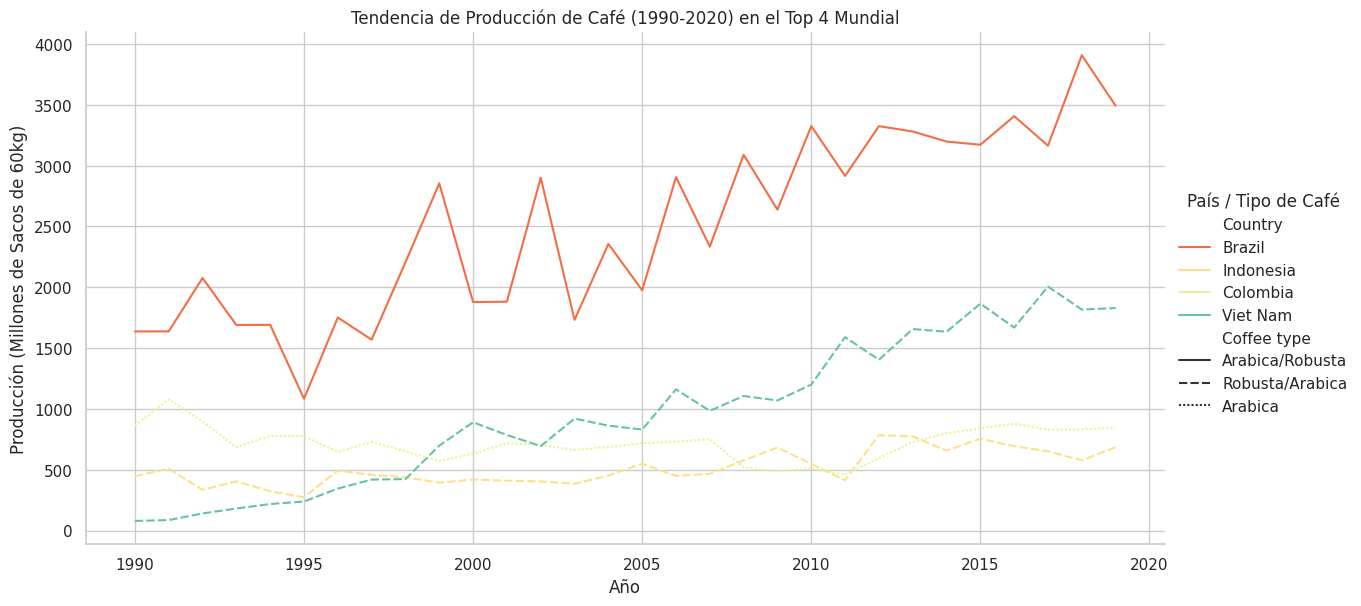

In [ ]:
# Filtrar para los 4 países con mayor producción para claridad en la visualización
top_countries = df_total.head(4)['Country'].tolist()
df_viz = df_long[df_long['Country'].isin(top_countries)]

# Asegurarse de que el Año sea numérico para el gráfico de línea (eliminar el "/xx" en el año)
df_viz['Year_Cleaned'] = df_viz['Year'].apply(lambda x: int(x.split('/')[0]))

plt.figure(figsize=(14, 8))

# Gráfico de línea multivariado con facetado para tendencia de tipo de café
g = sns.relplot(
    data=df_viz,
    x='Year_Cleaned',
    y='Production_Million_Bags',
    hue='Country',       # Variable 3: Distingue la línea por país
    style='Coffee type', # Variable 4: Distingue la línea por tipo de café
    kind='line',
    height=6,
    aspect=2,
    palette='Spectral'
)

plt.title('Tendencia de Producción de Café (1990-2020) en el Top 4 Mundial', loc='center')
g.set_axis_labels("Año", "Producción (Millones de Sacos de 60kg)")
g.legend.set_title("País / Tipo de Café")
plt.show()

In [ ]:
# Carga de librerías (si no se cargaron antes)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set_theme(style="whitegrid")

# Cargar el dataset de Importaciones
try:
    df_import = pd.read_csv('/content/drive/MyDrive/Coder/Entrega 1/Coffee_import.csv')
    print("Dataset de Importaciones cargado correctamente.")
except FileNotFoundError:
    print("Error: Asegúrate de haber subido '/content/drive/MyDrive/Coder/Entrega 1/Coffee_import.csv' a tu entorno de Google Colab.")
    exit()

# -----------------
# 🔍 Identificación de Valores Perdidos
# -----------------
print("\nConteo de Valores Perdidos (NaN) por Columna:")
missing_values = df_import.isnull().sum()
# Muestra solo las columnas con NaNs
print(missing_values[missing_values > 0])

# Imputación de NaNs: Asumimos que un valor perdido en una importación anual es cero.
# Excluimos la columna 'Country' y la de totales
import_columns = df_import.columns.drop(['Country', 'Total_import'])
df_import[import_columns] = df_import[import_columns].fillna(0)

# Verificación
print(f"\nTotal de NaNs en el dataset después de imputación: {df_import.isnull().sum().sum()}")


# -----------------
# 📐 Preparación para el Mapa de Calor (Transformación de datos)
# -----------------
# 1. Eliminar la columna de totales para evitar distorsión
df_viz_import = df_import.drop(columns=['Total_import'])

# 2. Transformar el formato de 'ancho' a 'largo' (Melting)
df_long_import = df_viz_import.melt(
    id_vars=['Country'],
    value_vars=import_columns,
    var_name='Year',
    value_name='Import_Volume'
)

# 3. Convertir las unidades a millones de sacos para mejor visualización
df_long_import['Import_Million_Bags'] = df_long_import['Import_Volume'] / 1000000

# 4. Encontrar los 10 países con mayor importación histórica para el gráfico
top_10_importers = df_long_import.groupby('Country')['Import_Million_Bags'].sum().nlargest(10).index.tolist()
df_top_10 = df_long_import[df_long_import['Country'].isin(top_10_importers)]

# 5. Pivotear para crear la matriz País vs. Año necesaria para el Heatmap
pivot_table = df_top_10.pivot_table(
    index='Country',
    columns='Year',
    values='Import_Million_Bags',
    aggfunc='sum'
)

print("\nEstructura Pivotada (País vs. Año) para Heatmap:")
print(pivot_table.head())

Dataset de Importaciones cargado correctamente.

Conteo de Valores Perdidos (NaN) por Columna:
Series([], dtype: int64)

Total de NaNs en el dataset después de imputación: 0

Estructura Pivotada (País vs. Año) para Heatmap:
Year           1990    1991    1992    1993    1994    1995    1996    1997  \
Country                                                                       
Belgium        0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
France       378.06  393.18  396.72  380.04  382.14  372.84  399.60  402.24   
Germany      820.26  793.74  827.34  846.42  814.98  771.12  810.42  834.30   
Italy        314.52  277.80  275.70  335.64  333.24  323.28  336.48  344.58   
Netherlands  187.68  187.26  192.30  168.24  168.00  174.60  185.04  175.44   

Year           1998    1999  ...     2010     2011     2012     2013     2014  \
Country                      ...                                                
Belgium        0.00  180.18  ...   355.44   349.68   340.08 

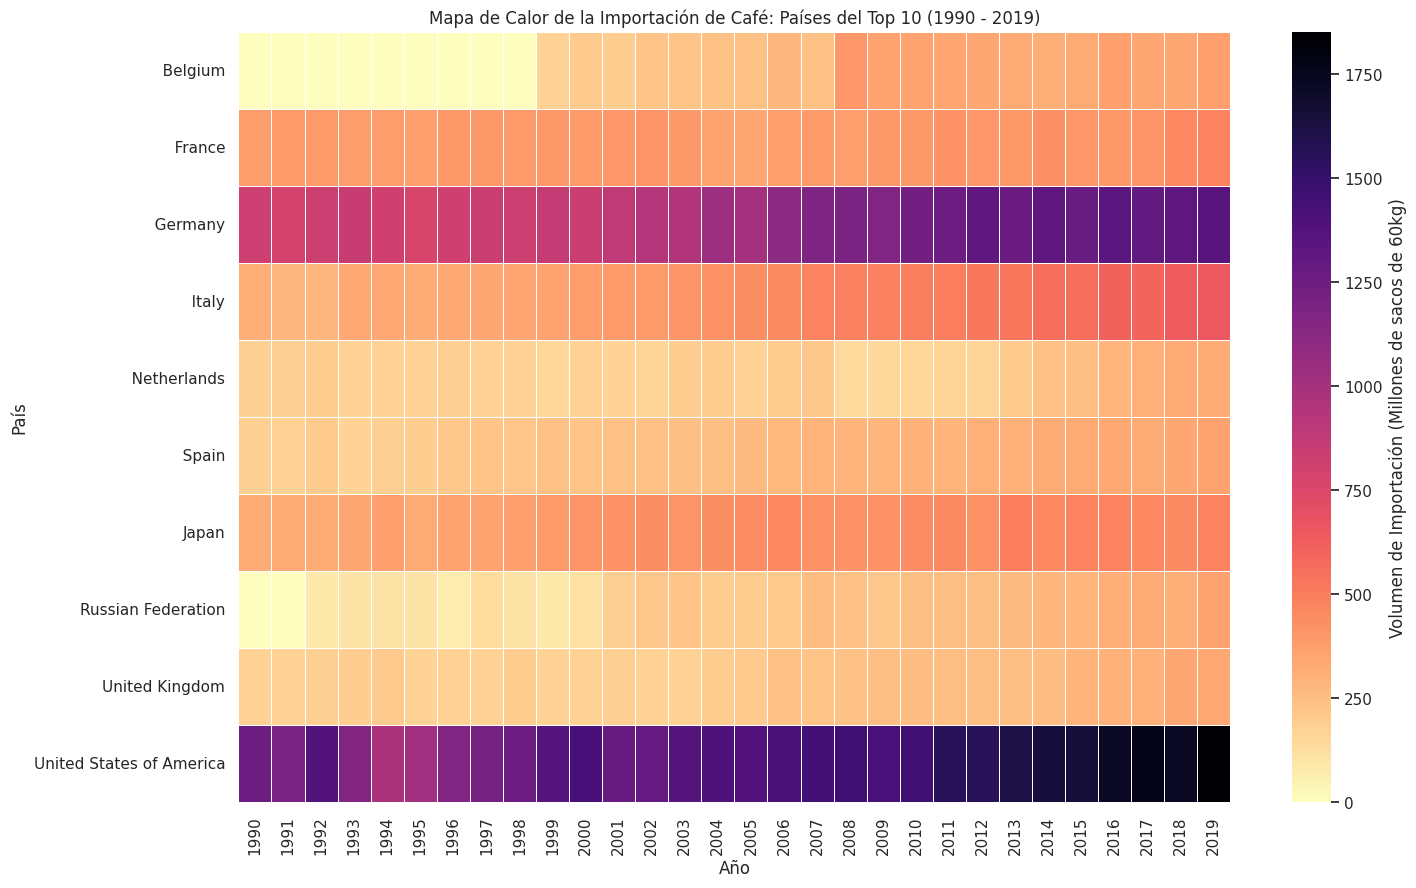

In [ ]:
# Crear el Mapa de Calor (Heatmap)
plt.figure(figsize=(16, 10))
sns.heatmap(
    pivot_table,
    cmap='magma_r',      # Usar un mapa de color que enfatice los altos valores
    annot=False,         # No mostrar el número dentro de cada celda (demasiado denso)
    linewidths=.5,
    linecolor='white',
    cbar_kws={'label': 'Volumen de Importación (Millones de sacos de 60kg)'}
)

plt.title('Mapa de Calor de la Importación de Café: Países del Top 10 (1990 - 2019)')
plt.ylabel('País')
plt.xlabel('Año')
plt.yticks(rotation=0)
plt.show()

In [ ]:
consumption_columns = df_cons.columns.drop(['Country', 'Coffee type', 'Total_domestic_consumption'])
df_cons[consumption_columns] = df_cons[consumption_columns].fillna(0)

df_long_cons = df_cons.melt(
    id_vars=['Country', 'Coffee type'],
    value_vars=consumption_columns,
    var_name='Year',
    value_name='Consumption_Volume'
)

df_long_cons['Consumption_Million_Bags'] = df_long_cons['Consumption_Volume'] / 1_000_000
df_clean_cons = df_long_cons[df_long_cons['Consumption_Million_Bags'] > 0]


Cantidad de países: 53

Top 10 países consumidores:
Country
Brazil         27824.700000
Indonesia       4920.480000
Ethiopia        4536.540000
Mexico          3189.660000
Philippines     2807.280000
Colombia        2536.776384
Venezuela       2386.067999
India           2093.460000
Viet Nam        1920.928320
Thailand        1248.600000
Name: Consumption_Million_Bags, dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


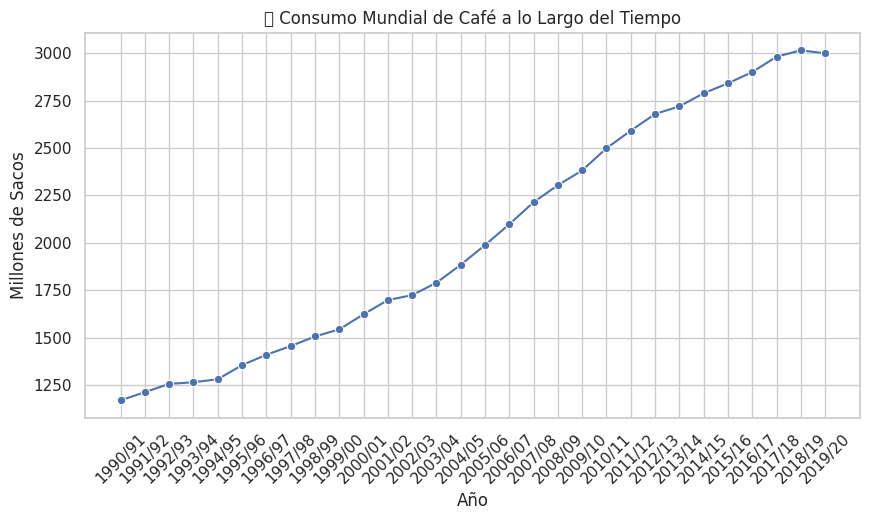

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


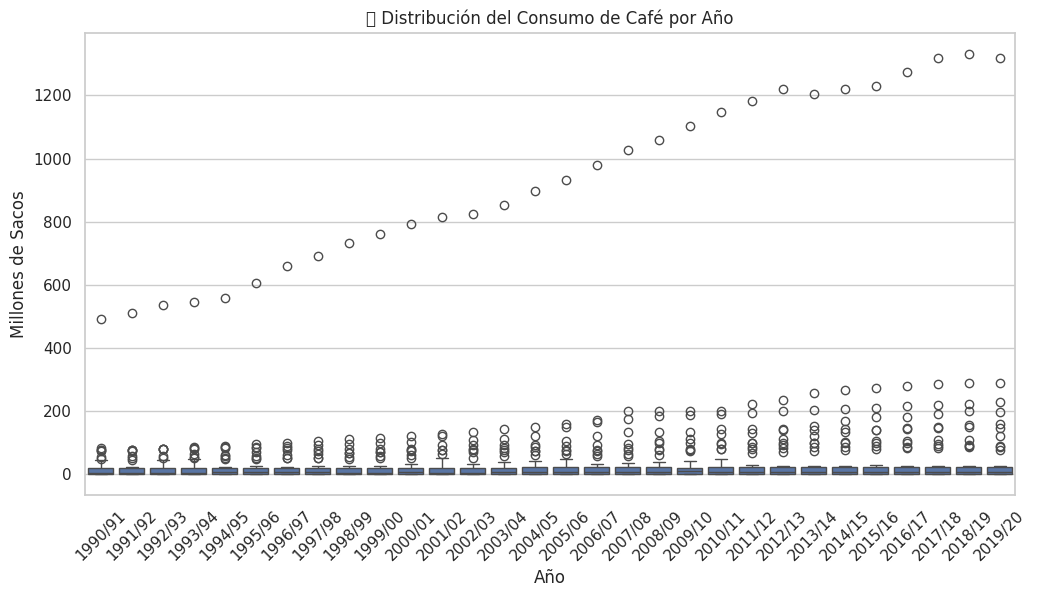

In [ ]:
# Cantidad de países
print("\nCantidad de países:", df_clean_cons['Country'].nunique())

# Top 10 países consumidores
consumo_total_pais = df_clean_cons.groupby('Country')['Consumption_Million_Bags'].sum().sort_values(ascending=False)
print("\nTop 10 países consumidores:")
print(consumo_total_pais.head(10))

# Gráfico de evolución global del consumo
consumo_anual = df_clean_cons.groupby('Year')['Consumption_Million_Bags'].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x=consumo_anual.index, y=consumo_anual.values, marker='o')
plt.title("📈 Consumo Mundial de Café a lo Largo del Tiempo")
plt.ylabel("Millones de Sacos")
plt.xlabel("Año")
plt.xticks(rotation=45)
plt.show()

# Distribución del consumo anual (Box Plot)
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean_cons, x='Year', y='Consumption_Million_Bags')
plt.title("📦 Distribución del Consumo de Café por Año")
plt.ylabel("Millones de Sacos")
plt.xlabel("Año")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1181948130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1181948130.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


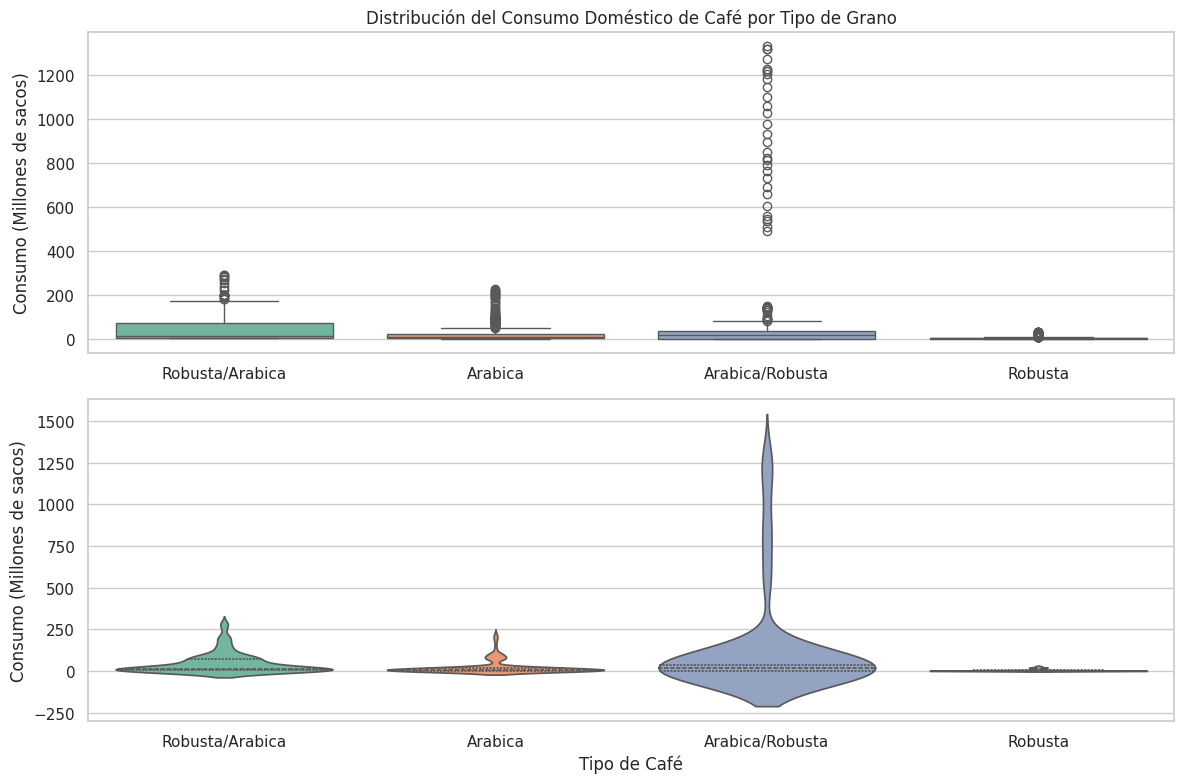

In [ ]:
plt.figure(figsize=(12, 8))

# Box Plot
plt.subplot(2, 1, 1) # 2 filas, 1 columna, gráfico 1
sns.boxplot(
    data=df_clean_cons,
    x='Coffee type',
    y='Consumption_Million_Bags',
    palette='Set2'
)
plt.title('Distribución del Consumo Doméstico de Café por Tipo de Grano')
plt.xlabel('') # Dejarlo vacío para que el Violin Plot lo muestre
plt.ylabel('Consumo (Millones de sacos)')

# Violin Plot (para ver la densidad de la distribución)
plt.subplot(2, 1, 2) # 2 filas, 1 columna, gráfico 2
sns.violinplot(
    data=df_clean_cons,
    x='Coffee type',
    y='Consumption_Million_Bags',
    palette='Set2',
    inner='quartile' # Muestra los cuartiles dentro del violín
)
plt.xlabel('Tipo de Café')
plt.ylabel('Consumo (Millones de sacos)')

plt.tight_layout()
plt.show()